<a href="https://colab.research.google.com/github/mubasshar009/ML_DL_Model/blob/master/The_Boston_Housing_Price_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting house prices: a regression example

In [24]:
from keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets) = boston_housing.load_data()

In [25]:
train_data.shape

(404, 13)

In [26]:
test_data.shape

(102, 13)

In [27]:
train_targets[0]

15.2

# 3.6.2 Preparing the data


## Normalizing the data

In [28]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis =0)
train_data /= std
test_data  -= mean
test_data /= std

# Building your network

In [29]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

# Validating your approach using K-fold validation
## K-fold validation

In [30]:
import numpy as np

In [31]:
k = 4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []


# Prepares the validation data: data from partition #k

In [32]:
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)

  model = build_model()

  model.fit(partial_train_data,partial_train_targets,epochs = num_epochs,batch_size = 1,verbose = 0)


  val_mse,val_mae = model.evaluate(val_data,val_targets,verbose = 0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [33]:
all_scores

[2.231003522872925, 2.581488609313965, 2.7274274826049805, 2.6234211921691895]

In [34]:
np.mean(all_scores)

2.540835201740265

# Saving the validation logs at each fold

In [41]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold # ', i)
  val_data = train_data[i * num_val_samples:(i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]


  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)


  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1 ) * num_val_samples:]],axis = 0)
  

  model = build_model()

 
  history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0)

  mae_history  = history.history['val_mae']


  all_mae_histories.append(mae_history)



processing fold #  0
processing fold #  1
processing fold #  2
processing fold #  3


In [40]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

# Building the history of successive mean K-fold validation scores

In [42]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

# Plotting validation scores

In [43]:
import matplotlib.pyplot as plt

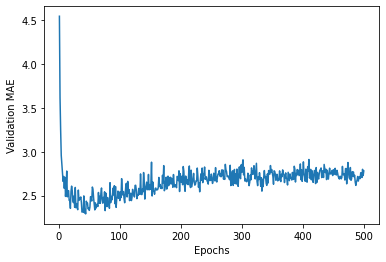

In [44]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Plotting validation scores, excluding the first 10 data points

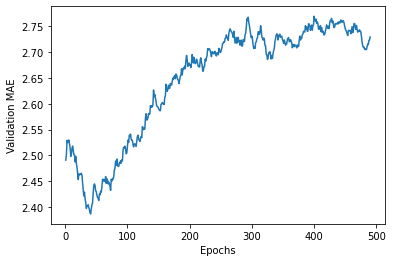

In [46]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Training the final model

In [47]:
model = build_model()
model.fit(train_data,train_targets,epochs = 80,batch_size = 16,verbose = 0)
test_mse_score,test_mae_score = model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 16.8468 - mae: 2.6023


In [48]:
test_mae_score

2.602290630340576